# Use of statmod package with a fake dataset

In [1]:
from statmod import linear
import pandas as pd

To show how to use the package i'm going to use a fake dataset with three possible regressors and one target.

In [2]:
data = pd.read_csv("fake.csv")
data.head()

,y,x1,x2,x3
0,0.469738,-1.378157,1.048472,-1.639982
1,0.056118,0.086049,-0.082724,0.288844
2,0.058006,0.353400,0.338237,0.323043
3,-1.104201,-0.059364,-0.058184,-0.230161
4,0.179603,-0.393503,-0.146603,-0.134122


The first model computed is made with all the possible explanatory variables and the normal equation

In [3]:
X = data[["x1", "x2", "x3"]]
y = data["y"]

In [4]:
dummy_model = linear(X,y)

In [5]:
dummy_model.normal()

array([ 0.01330219, -0.52341693,  0.17159209,  0.13044325])

As shown by the summary, the model is quite poor $R^{2} = 0.1298$ and the regressors $x1$ and $x3$ are very correlated affecting the outcome

In [6]:
dummy_model.summary()

_______________________________________________________________
============================SUMMARY============================
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
RSS: 211.783, MSS: 31.5811, TSS: 243.364 
Coefficient of determination: 0.1298
Coefficient of determination adjusted: 0.1165
F value: 9.7425
p-value (H0: R = 0): 5e-06
---------------------------------------------------------------
           Estimated value  Std Error  t-value  p-value
Intercept           0.0133     0.0733   0.1815   0.8561
       x1          -0.5234     0.3056  -1.7130   0.0883
       x2           0.1716     0.1166   1.4716   0.1427
       x3           0.1304     0.2840   0.4593   0.6466
---------------------------------------------------------------
Multicollinearity:
        R2     TOL      VIF
x1  0.9485  0.0515  19.4175
x2  0.5758  0.4242   2.3574
x3  0.9456  0.0544  18.3824
_______________________________________________________________


We solve the situation by removing one of the regressors even if this doesn't improve the model outcome

In [7]:
x = data[["x1", "x2"]]

In [8]:
dummy_model = linear(x,y)

In [9]:
dummy_model.normal()

array([ 0.01513369, -0.38696155,  0.13184408])

In [10]:
dummy_model.summary()

_______________________________________________________________
============================SUMMARY============================
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
RSS: 212.0063, MSS: 31.3577, TSS: 243.364 
Coefficient of determination: 0.1289
Coefficient of determination adjusted: 0.1201
F value: 14.5691
p-value (H0: R = 0): 1e-06
---------------------------------------------------------------
           Estimated value  Std Error  t-value  p-value
Intercept           0.0151     0.0732   0.2067   0.8364
       x1          -0.3870     0.0714  -5.4225   0.0000
       x2           0.1318     0.0782   1.6864   0.0933
---------------------------------------------------------------
Multicollinearity:
        R2     TOL     VIF
x1  0.0554  0.9446  1.0586
x2  0.0554  0.9446  1.0586
_______________________________________________________________


The `show` method allows us to see the prediction and compare this with the observations.

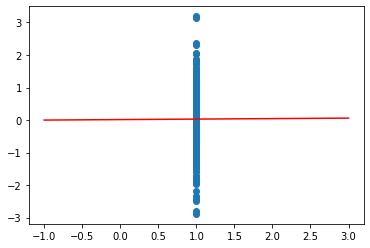

In [11]:
dummy_model.show(0)